<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Aula_228_Ejem_Cifar_10_Convu_7_DIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 235ms/step


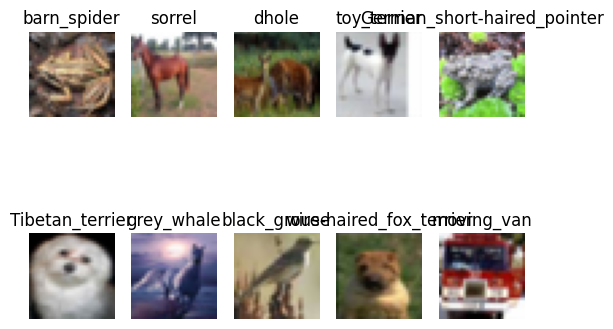

In [12]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import pickle

# Monta el drive
from google.colab import drive
drive.mount('/content/drive')

# Directorio de los datos CIFAR-10
cifar10_dir = '/content/drive/MyDrive/cifar-10-batches-py/'

# Función para cargar datos CIFAR-10
def load_cifar10_batch(batch_filename):
    with open(batch_filename, 'rb') as file:
        batch_data = pickle.load(file, encoding='bytes')
    return batch_data

# Cargar modelo InceptionV3 preentrenado
model = InceptionV3(weights='imagenet')

# Obtener imágenes y etiquetas
test_batch_filename = os.path.join(cifar10_dir, 'test_batch')
test_batch_data = load_cifar10_batch(test_batch_filename)
images = test_batch_data[b'data']
labels = test_batch_data[b'labels']

# Seleccionar 10 imágenes aleatorias
random_indices = random.sample(range(len(images)), 10)
selected_images = [images[i] for i in random_indices]
selected_labels = [labels[i] for i in random_indices]

# Preprocesar imágenes y realizar predicciones
for i, img_data in enumerate(selected_images):
    # Redimensionar la imagen a (299, 299)
    img = img_data.reshape(3, 32, 32).transpose([1, 2, 0])
    img = image.array_to_img(img)
    img = img.resize((299, 299))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    # Realizar la predicción
    predictions = model.predict(img)
    decoded_predictions = decode_predictions(predictions, top=1)[0]
    label = decoded_predictions[0][1]

    # Mostrar la imagen con la etiqueta
    plt.subplot(2, 5, i + 1)
    plt.imshow(img_data.reshape(3, 32, 32).transpose([1, 2, 0]) / 255.0)
    plt.title(label)
    plt.axis('off')

plt.show()
